# Importing Data Set & Libraries

In [15]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

df  = pd.read_csv(r'C:\Users\Shyam Adsul\Desktop\glass.csv')


In [16]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [48]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [18]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


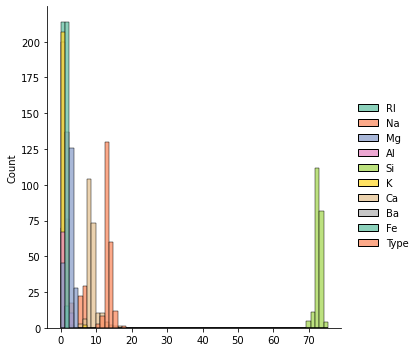

In [19]:
sns.displot(palette= 'Set2',data=df)

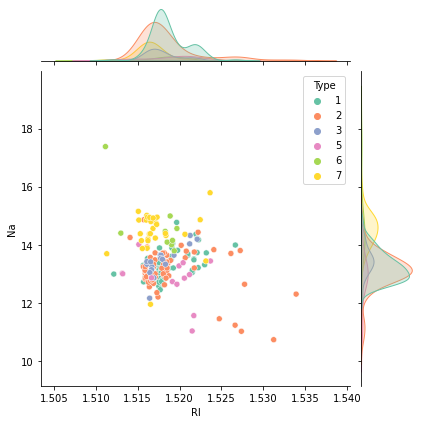

In [20]:
sns.jointplot(x='RI',y='Na',hue='Type',palette= 'Set2',data=df)

In [31]:
X = df.drop(['Type'],axis=1)
y = df['Type']


In [49]:
x_train,x_test,y_train, y_test = train_test_split(X,y, test_size=0.30)

# Decision Tree 

In [50]:
model = tree.DecisionTreeClassifier()

In [51]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
pred_model = model.predict(x_test)

In [53]:
pred_model

array([2, 2, 2, 3, 2, 5, 7, 5, 5, 1, 7, 1, 7, 1, 3, 2, 1, 5, 2, 1, 2, 2,
       1, 3, 2, 2, 2, 3, 2, 1, 1, 2, 5, 3, 2, 2, 7, 2, 5, 5, 7, 1, 1, 1,
       1, 3, 2, 7, 5, 2, 2, 3, 7, 6, 1, 1, 7, 1, 1, 2, 6, 1, 1, 1, 7],
      dtype=int64)

In [54]:
print (metrics.confusion_matrix(y_test,pred_model))

[[15  4  2  0  0  0]
 [ 1 13  1  3  2  0]
 [ 2  2  3  0  0  0]
 [ 0  0  0  4  0  0]
 [ 1  1  1  0  0  1]
 [ 0  0  0  1  0  8]]


In [55]:
print (metrics.accuracy_score(y_test,pred_model)*100,"%")


66.15384615384615 %


In [56]:
result = pd.crosstab(y_test, pred_model, rownames=['Actual'], colnames=['Predicted'],margins=True)
result

Predicted,1,2,3,5,6,7,All
Actual,,,,,,,
1,15,4,2,0,0,0,21
2,1,13,1,3,2,0,20
3,2,2,3,0,0,0,7
5,0,0,0,4,0,0,4
6,1,1,1,0,0,1,4
7,0,0,0,1,0,8,9
All,19,20,7,8,2,9,65


# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier


In [58]:
model_forest = RandomForestClassifier()   
model_forest.fit(x_train, y_train)   

RandomForestClassifier()

In [59]:
Y_pred = model_forest.predict(x_test)  # test the output by changing values 


In [60]:
Y_pred

array([1, 2, 1, 3, 2, 5, 7, 5, 7, 1, 7, 6, 7, 1, 3, 2, 1, 5, 2, 1, 2, 2,
       1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 5, 3, 2, 2, 7, 2, 5, 5, 7, 2, 1, 1,
       1, 1, 2, 7, 5, 2, 2, 6, 6, 5, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 7],
      dtype=int64)

In [61]:
print (metrics.accuracy_score(y_test,Y_pred)*100,"%")


80.0 %


In [62]:
result = pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
result

Predicted,1,2,3,5,6,7,All
Actual,,,,,,,
1,20,1,0,0,0,0,21
2,1,14,1,4,0,0,20
3,3,2,2,0,0,0,7
5,0,0,0,4,0,0,4
6,0,1,0,0,3,0,4
7,0,0,0,0,0,9,9
All,24,18,3,8,3,9,65


# Inferance

steps performed are as follow:
1)importing libraries
2)loading dataset
3)seeing info of data
4)then described the data for 20,50,75 %tile.
5)Zero Null Values.
6)data range is in small so no scaling and also decision tree no need to for scaling dataset.
7)Then Splitting Data Set in ratio of 70:30
8)After building model decision tree got 66.15384615384615 %
9)After building model random forest got 80.0 %
10)But if I buid model on 75:25 accuracy of random forest stay at 70% So i used 70:30 for splitting data as training and testing.
